In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense

In [2]:
data = []
labels = []
number_classes = 43
cur_parth = os.getcwd()

In [4]:
for i in range (number_classes):
    path = os.path.join(cur_parth, 'Train/', str(i))
    images = os.listdir(path)
    
    for a in images:
        
        try:
            image = Image.open(path + '\\'+a)
            image = image.resize((30,30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print('Error')
            
data = np.array(data)
labels = np.array(labels)

In [6]:
data.shape

(39209, 30, 30, 3)

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

print(x_train.shape, x_test.shape)

(31367, 30, 30, 3) (7842, 30, 30, 3)


# Building the model

In [14]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu', input_shape= x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(4,4), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(2,2), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(units=43, activation='softmax'))

In [15]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
EPOCHS = 15
history = model.fit(x=x_train, y=y_train, batch_size=64, epochs=EPOCHS, validation_data=(x_test,y_test))

Epoch 1/15
491/491 [==============================] - 95s 182ms/step - loss: 4.1195 - accuracy: 0.2477 - val_loss: 0.7745 - val_accuracy: 0.7882
Epoch 2/15
491/491 [==============================] - 107s 218ms/step - loss: 0.9854 - accuracy: 0.7038 - val_loss: 0.3777 - val_accuracy: 0.8944
Epoch 3/15
491/491 [==============================] - 106s 216ms/step - loss: 0.6521 - accuracy: 0.7981 - val_loss: 0.2156 - val_accuracy: 0.9439
Epoch 4/15
491/491 [==============================] - 103s 209ms/step - loss: 0.5035 - accuracy: 0.8455 - val_loss: 0.1493 - val_accuracy: 0.9610
Epoch 5/15
491/491 [==============================] - 112s 229ms/step - loss: 0.4259 - accuracy: 0.8663 - val_loss: 0.1544 - val_accuracy: 0.9665
Epoch 6/15
491/491 [==============================] - 110s 224ms/step - loss: 0.3609 - accuracy: 0.8856 - val_loss: 0.1430 - val_accuracy: 0.9615
Epoch 7/15
491/491 [==============================] - 107s 219ms/step - loss: 0.3534 - accuracy: 0.8896 - val_loss: 0.0987 - 

# Plotting accuracy

<function matplotlib.pyplot.legend(*args, **kwargs)>

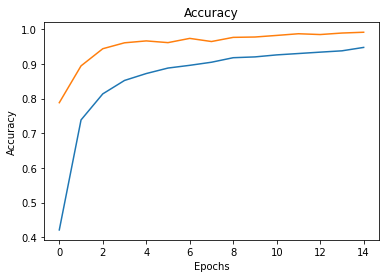

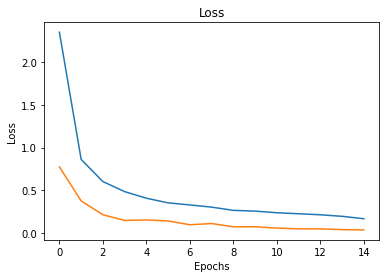

In [18]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label=' val accuracy')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend


# Testing the model

In [19]:
from sklearn.metrics import accuracy_score
test_set = pd.read_csv('Test.csv')

test_set.head

<bound method NDFrame.head of        Width  Height  Roi.X1  Roi.Y1  Roi.X2  Roi.Y2  ClassId            Path
0         53      54       6       5      48      49       16  Test/00000.png
1         42      45       5       5      36      40        1  Test/00001.png
2         48      52       6       6      43      47       38  Test/00002.png
3         27      29       5       5      22      24       33  Test/00003.png
4         60      57       5       5      55      52       11  Test/00004.png
...      ...     ...     ...     ...     ...     ...      ...             ...
12625     42      41       5       6      37      36       12  Test/12625.png
12626     50      51       6       5      45      46       33  Test/12626.png
12627     29      29       6       6      24      24        6  Test/12627.png
12628     48      49       5       6      43      44        7  Test/12628.png
12629     32      31       6       5      27      26       10  Test/12629.png

[12630 rows x 8 columns]>

In [21]:
labels_test = test_set['ClassId'].values
imgs = test_set['Path'].values

data = []


for i in imgs:
    
    image = Image.open(i)
    image = image.resize((30,30))
    image = np.array(image)
    
    data.append(image)
    
data = np.array(data)

prediction = model.predict_classes(data)

acc = accuracy_score(prediction, labels_test)

print(acc)


C:\Users\User\anaconda3\envs\test\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


0.9634204275534441


In [22]:
model.save('traffic_signs_recognition.h5')